In [95]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

variants = pd.read_csv("plotting.csv")

# Sort by AF
variants.sort_values(by = ["AF"], inplace = True, ascending = False)

populations = ["eas", "sas", "nfe", "asj", "amr", "fin", "afr"]

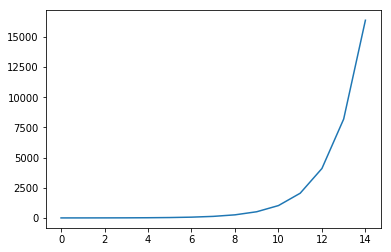

In [96]:
# BASIC PLOT
powers_2 = []
for i in range(15):
    powers_2.append (2 ** i)
# or with a list comprehension (a lot of the for loops that follow can be implemented using list comprehensions)
powers_2 = [2 ** i for i in range(15)]

plt.plot(powers_2)
plt.show()

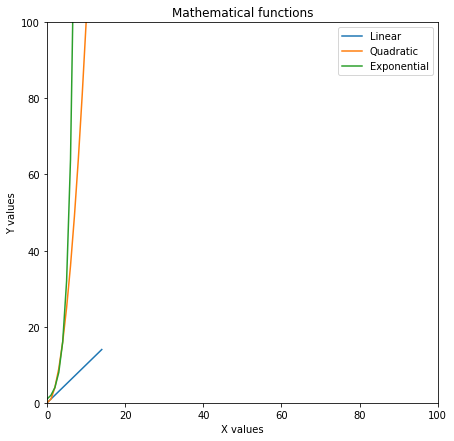

In [4]:
plt.figure(figsize = (7, 7))

plt.xlabel("X values")
plt.ylabel("Y values")

plt.xlim(0, 100)
plt.ylim(0, 100)

linear = []
quadratic = []
exponential = []

# Add values for each function (could be done with list comprehension)
for i in range(15):
    linear.append(i)
    quadratic.append(i**2)
    exponential.append(2**i)
    
# Plot each function    
plt.plot(linear, label="Linear")
plt.plot(quadratic, label="Quadratic")
plt.plot(exponential, label="Exponential")

plt.title("Mathematical functions")

plt.legend(loc="upper right")

plt.show()

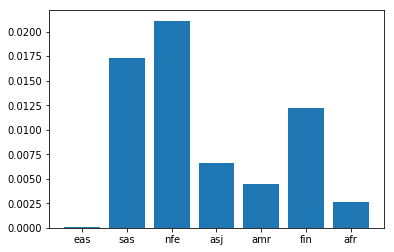

In [100]:
first_variant = variants.iloc[0]

# Get frequency for each population
frequencies = []
for population in populations:
    frequencies.append(first_variant["AF_" + population])
    
plt.bar(populations, frequencies)
plt.show()

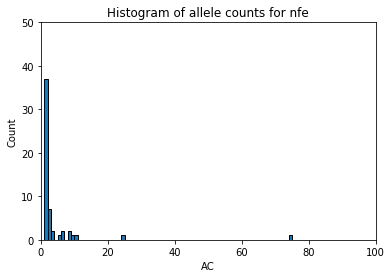

In [99]:
# Histogram
plt.hist("AC_nfe", range(1,100) , data=variants, edgecolor="black")

plt.title("Histogram of allele counts for nfe")
plt.xlabel("AC")
plt.xlim(0, 100)
plt.ylabel("Count")
plt.ylim(0, 50)
plt.show()

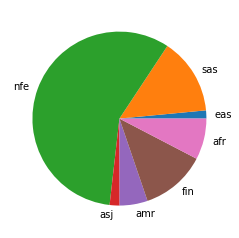

In [102]:
# Pie Chart
wedges = []

# Get widge size for each population
for population in populations:
    wedges.append(variants["AC_" + population].sum())

# List comprehension version    
wedges = [variants["AC_"+ population].sum() for population in populations]

plt.pie(wedges, labels=populations)
plt.show()

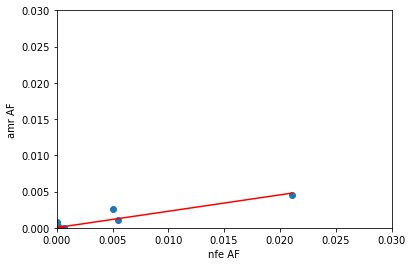

In [104]:
# Scatter Plot
plt.scatter("AF_nfe", "AF_amr", data = variants)

plt.xlabel("nfe AF")
plt.xlim(0, 0.03)
plt.ylabel("amr AF")
plt.ylim(0, 0.03)

# Get linear regression line
linear_model = LinearRegression()
X = variants["AF_nfe"].values.reshape(-1, 1) 
Y = variants["AF_amr"].values.reshape(-1, 1)
linear_model.fit(X, Y) 
y_values = linear_model.predict(X)

# Plot line
plt.plot(X, y_values, color="red")

plt.show()

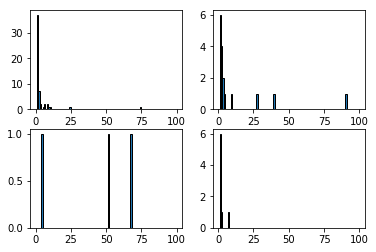

In [9]:
# Subplot

fig, ax = plt.subplots(nrows=2, ncols=2)

# Top left
curr_plt = ax[0][0]
curr_plt.hist("AC_nfe", range(1,100) , data=variants, edgecolor="black")

# Top right
curr_plt = ax[0][1]
curr_plt.hist("AC_amr", range(1,100) , data=variants, edgecolor="black")

# Bottom left
curr_plt = ax[1][0]
curr_plt.hist("AC_asj", range(1,100) , data=variants, edgecolor="black")

# Bottom right
curr_plt = ax[1][1]
curr_plt.hist("AC_fin", range(1,100) , data=variants, edgecolor="black")

plt.show()

In [10]:
# Colors
colors = ["#ff5252", "#ffd152", "#86ff52", "#52ffe2", "#5283ff", "#dc52ff"]
sns.set_palette(colors)

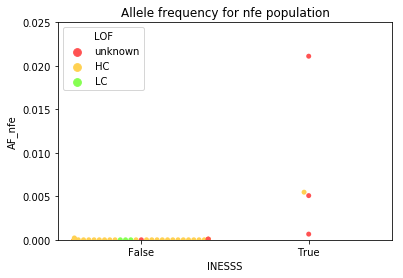

In [14]:
# Swarm Plot
sns.swarmplot(x = "INESSS", y = "AF_nfe", hue = "LOF", data = variants)
plt.ylim(0, 0.025)

plt.title("Allele frequency for nfe population")

plt.show()

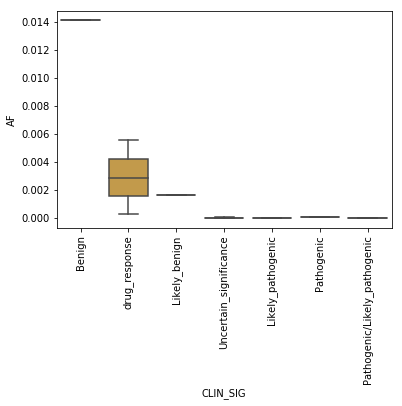

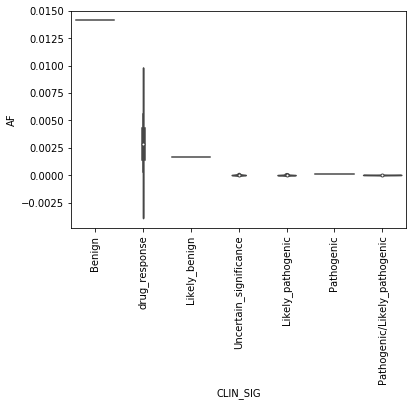

In [21]:
# Box/violin plot
sns.boxplot(x="CLIN_SIG", y="AF", data=variants, showfliers=False)
plt.xticks(rotation=90)
plt.show()

sns.violinplot(x="CLIN_SIG", y="AF", data=variants, showfliers=False)
plt.xticks(rotation=90)
plt.show()

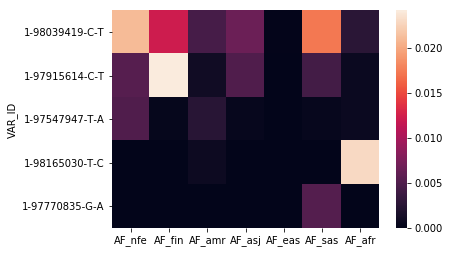

In [27]:
# Heatmap
heatmap = variants.set_index("VAR_ID")

heatmap_head = heatmap.head()

sns.heatmap(heatmap_head[["AF_nfe", "AF_fin", "AF_amr", "AF_asj", "AF_eas", "AF_sas", "AF_afr"]]) # Just access columns of interest
plt.show()

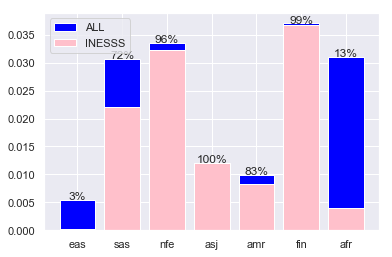

In [105]:
# Final

# Create DataFrame just with rows where INESSS is True
inesss = variants[variants["INESSS"] == True]

# Create list of inesss frequencies
inesss_freq = []
for population in populations:
    inesss_freq.append(inesss["AF_" + population].sum())

# Create list of non-inesss frequencies
non_inesss_freq = []
for population in populations:
    non_inesss_freq.append(variants["AF_" + population].sum())
    
sns.set_style('darkgrid')
sns.set()

# Start with non_inesss since we want it behind the inesss bars
plt.bar(populations, non_inesss_freq, label="ALL", color="blue")

plt.bar(populations, inesss_freq, label="INESSS", color="pink")

plt.legend()

# Compute proportions
proportions = []
# Both lists of same length, loop over indices and calculate proportion of corresponding indices
for i in range(len(inesss_freq)):
    proportions.append(inesss_freq[i] / non_inesss_freq[i])
    
def to_percentage(number):
    rounded = round(number, 2)
    percentage = int(rounded * 100) # Convert to int to avoid .0
    percentage_string = str(percentage) + "%" # Need to convert integer to string to concatenate
    
    return percentage_string

# Convert proportions list to percentages
percentages = [] 
for proportion in proportions:
    percentages.append(to_percentage(proportion))

# i keeps track of the index we're at (increment at each iteration)
i = 0
for percentage in percentages:
    plt.text(i, non_inesss_freq[i], percentage, ha="center")
    i += 1
    
plt.show()